In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [3]:
df_covid = pd.read_csv("covid_19_clean_complete.csv") # csv den data okuyoruz
df_covid.head() # ilk beş satır

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa


In [6]:
df_covid.tail() # son beş satır

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
38884,NaN,Sao Tome and Principe,0.186360,6.613081,2020-06-18,688,12,191,485,Africa
38885,NaN,Yemen,15.552727,48.516388,2020-06-18,909,248,273,388,Eastern Mediterranean
38886,NaN,Comoros,-11.645500,43.333300,2020-06-18,210,5,129,76,Africa
38887,NaN,Tajikistan,38.861034,71.276093,2020-06-18,5279,51,3762,1466,Europe
38888,NaN,Lesotho,-29.609988,28.233608,2020-06-18,4,0,2,2,Africa


In [7]:
df_covid.describe() # sayısal kolonların genel hesaplama özeti

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,38889.000000,38889.000000,3.888900e+04,38889.000000,38889.000000,3.888900e+04
mean,21.362269,23.701848,9.020540e+03,560.147754,3402.299082,5.058093e+03
std,24.969887,70.158193,7.100308e+04,4543.654747,22340.891460,4.862819e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000,-1.400000e+01
25%,7.540000,-15.310100,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,23.685000,21.758700,7.700000e+01,1.000000,9.000000,1.200000e+01
75%,41.204400,81.000000,8.840000e+02,12.000000,294.000000,3.170000e+02
max,71.706900,178.065000,2.191052e+06,118434.000000,599115.000000,1.473503e+06


In [7]:
df_covid["Country/Region"].unique() # Ülkelerin isimlerini getirdik. Aşağıdaki grafik için buradan seçilip kullanılabillir.

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

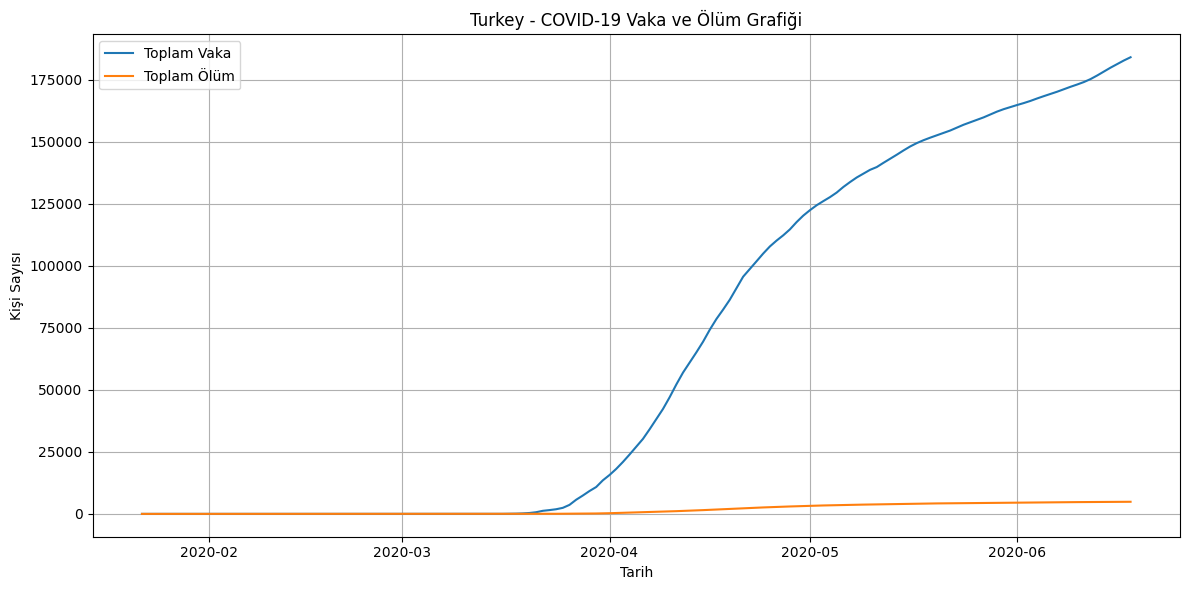

In [9]:
# Belirli bir ülke için vaka ve ölüm grafiği
country = "Turkey"
df_country = df_covid[df_covid["Country/Region"] == country].copy()

# Tarihleri datetime formatına çevir
df_country["Date"] = pd.to_datetime(df_country["Date"])

# Günlük vaka ve ölüm grafiği
plt.figure(figsize=(12, 6))
plt.plot(df_country["Date"], df_country["Confirmed"], label="Toplam Vaka")
plt.plot(df_country["Date"], df_country["Deaths"], label="Toplam Ölüm")
plt.title(f"{country} - COVID-19 Vaka ve Ölüm Grafiği")
plt.xlabel("Tarih")
plt.ylabel("Kişi Sayısı")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Aşağıdaki grafik, Türkiye için zaman içinde toplam vaka ve ölüm sayılarının nasıl değiştiğini gösteriyor. Gördüğün gibi 2020 ortalarından itibaren vaka ve ölüm sayıları kademeli şekilde artmış.

In [7]:
# En güncel tarihi alıyoruz.
latest_date = df_covid["Date"].max()

# En güncel tarihteki verileri filtreliyoruz.
df_latest = df_covid[df_covid["Date"] == latest_date]

# Ülke bazında grupluyoruz ve toplam değerleri alıyoruz.
summary = df_latest.groupby("Country/Region")[["Confirmed", "Deaths", "Recovered", "Active"]].sum()

# Vaka sayısına göre en çok etkilenen ilk 15 ülkeyi listeliyoruz.
top_countries = summary.sort_values(by="Confirmed", ascending=False).head(15)

top_countries

,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
US,2191052,118434,599115,1473503
Brazil,978142,47748,534580,395814
Russia,560321,7650,313409,239262
India,380532,12573,204711,163248
United Kingdom,301935,42373,1313,258249
Spain,245268,27136,150376,67756
Peru,244388,7461,131190,105737
Italy,238159,34514,180544,23101
Chile,225103,3841,186441,34821


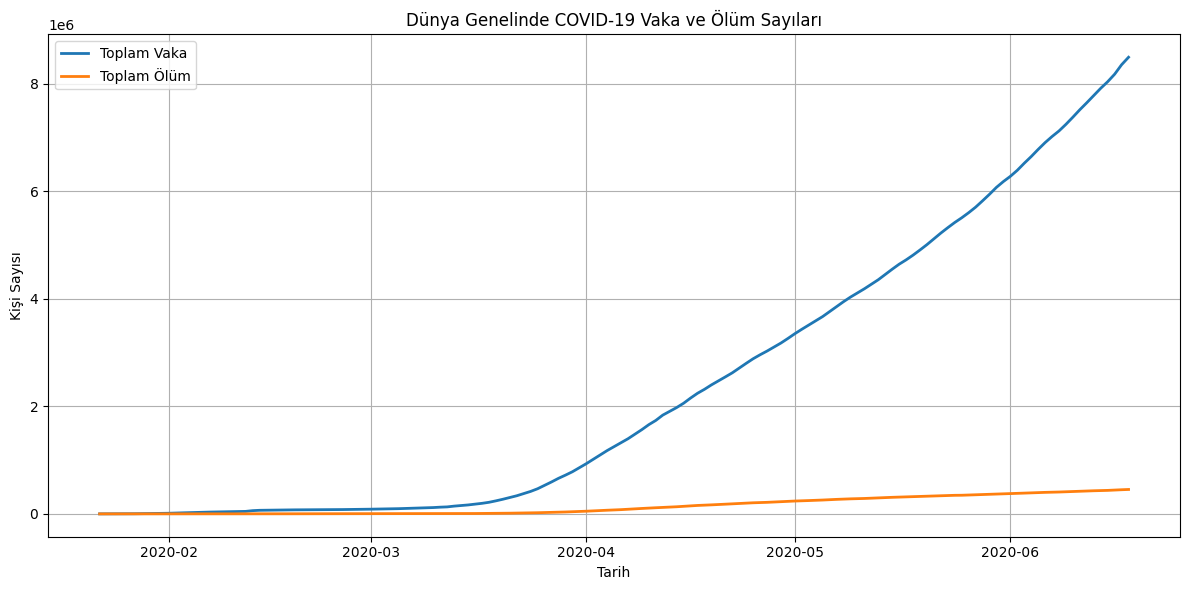

In [6]:
# Dünya genelinde zamana göre toplam vaka ve ölüm grafiği. Burada kişi sayısı kısmındaki değerler matplotlib in kendisinin yaptığı bir sadeleştirme. Bunu Milyon olarak düşünmeliyiz.

# Önce tarihleri datetime formatına çeviriyoruz.
df_covid["Date"] = pd.to_datetime(df_covid["Date"])

# Tüm dünya verisini tarih bazında gruplayarak toplam vaka ve ölüm hesaplıyoruz.
global_daily = df_covid.groupby("Date")[["Confirmed", "Deaths"]].sum()


plt.figure(figsize=(12, 6))
plt.plot(global_daily.index, global_daily["Confirmed"], label="Toplam Vaka", linewidth=2)
plt.plot(global_daily.index, global_daily["Deaths"], label="Toplam Ölüm", linewidth=2)
plt.title("Dünya Genelinde COVID-19 Vaka ve Ölüm Sayıları")
plt.xlabel("Tarih")
plt.ylabel("Kişi Sayısı")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

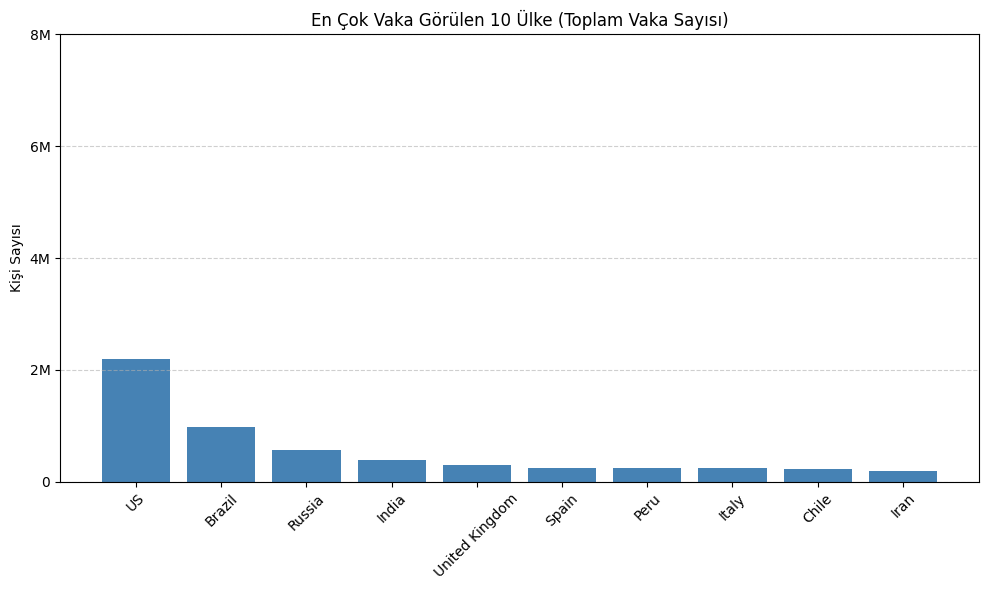

In [9]:
# En çok etkilenen 10 ülkenin toplam vaka sayısı (bar chart)

# En güncel tarihteki verileri alıyoruz.
latest_date = df_covid["Date"].max()
df_latest = df_covid[df_covid["Date"] == latest_date]

# Ülke bazında toplam vaka sayısı
country_totals = df_latest.groupby("Country/Region")["Confirmed"].sum().sort_values(ascending=False).head(10)

# Bar grafiği çiziyoruz.
plt.figure(figsize=(10, 6))
bars = plt.bar(country_totals.index, country_totals.values, color='steelblue')
plt.title("En Çok Vaka Görülen 10 Ülke (Toplam Vaka Sayısı)")
plt.ylabel("Kişi Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()

# Y eksenini bu sefer  M (milyon) cinsinden yazıyoruz.
plt.yticks(
    ticks=[0, 2_000_000, 4_000_000, 6_000_000, 8_000_000],
    labels=["0", "2M", "4M", "6M", "8M"]
)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

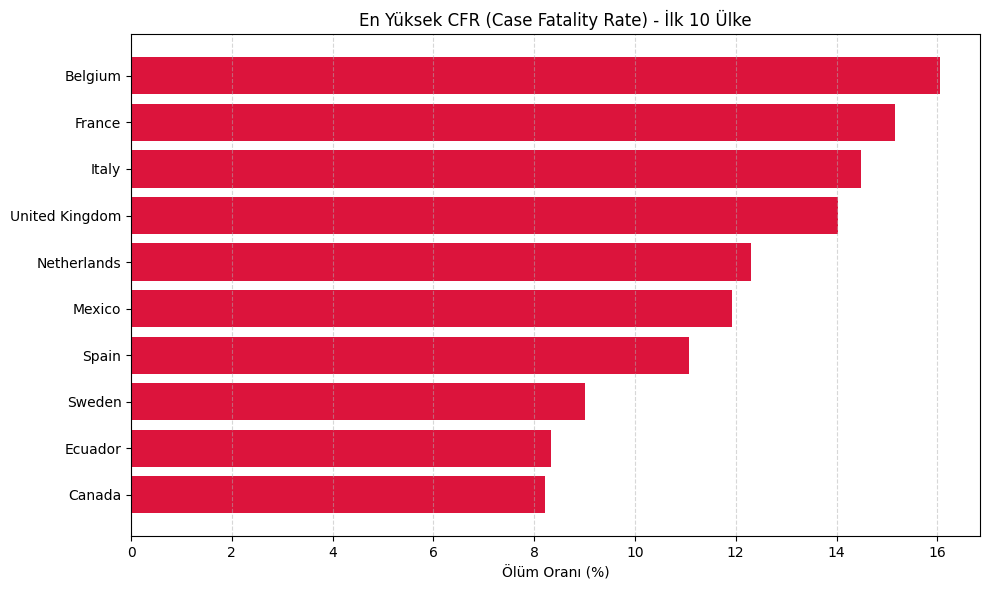

In [10]:
# CFR (Case Fatality Rate) - Ölüm Oranı. Yani bu oran ülkelere göre bu hastalığa yakalanan her 100 kişiden kaçı hayatını kaybetmiş bunu gösteriyor.

# En güncel tarihteki verileri alıyoruz.
latest_date = df_covid["Date"].max()
df_latest = df_covid[df_covid["Date"] == latest_date]

# Ülke bazında toplam vaka ve ölüm sayısı
summary = df_latest.groupby("Country/Region")[["Confirmed", "Deaths"]].sum()

# CFR oranını hesaplıyoruz (ölüm/vaka * 100)
summary["CFR (%)"] = (summary["Deaths"] / summary["Confirmed"]) * 100

# Çok düşük vaka sayıları olan ülkelerde oranın anlamı olmaz, bu yüzden filtre uyguluyoruz.
summary_filtered = summary[summary["Confirmed"] > 10000]  # 10.000 üzeri vaka şartı

# En yüksek ölüm oranına sahip 10 ülkeyi alıyoruz.
top_cfr = summary_filtered.sort_values(by="CFR (%)", ascending=False).head(10)


plt.figure(figsize=(10, 6))
plt.barh(top_cfr.index[::-1], top_cfr["CFR (%)"][::-1], color='crimson')
plt.xlabel("Ölüm Oranı (%)")
plt.title("En Yüksek CFR (Case Fatality Rate) - İlk 10 Ülke")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
